In [1]:
"""This notebook creates a hcp crystal by defining a small primitive cell, and then copying it periodically on a grid """

'This notebook creates a hcp crystal by defining a small primitive cell, and then copying it periodically on a grid '

In [2]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
import pdbfile_v2 as pdb

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
path = "/Users/eixeres/Desktop/Plots_grid_12x12/"
#path = "/Users/eixeres/Desktop/Plots_grid_36x36/"
#path = "/Users/burbol2/Desktop/PlotsLoops/Copy2"
os.chdir(path)

In [12]:
################ CREATE .pdb file of CHOSEN SURFACES (CHOOSE BY LOOKING AT OUTPUT PLOTS)   ################

# Iterate this process:

# 1. Create one SAM grid and store atom positions in variable pType
# 2. Run this cell

xPos, yPos = pdb.creategrid(Nx*xcopies, Ny*ycopies)
pdb.writepdb(pType, xPos, yPos, pc, Nx*xcopies, Ny*ycopies)

In [5]:
########################### SET PARAMETERS FOR THE SIZE ###############################

Nx = 4 # number of gridpoints in x-direction (carbons)
Ny = 2 # number of gridpoints in y-direction (carbons)

xcopies = 3
ycopies = 6

In [6]:
""" This cell isn't needed anymore. zlast is directly calculated inside the function pdb.writepdb """
# Approximate position of head groups on top of the surface so that the bottom ones are approx. at z=0
CCbondangle = 109.5
CCbondlength = 1.54
N_carbons = 11
zlast = N_carbons*CCbondlength*sin(radians(CCbondangle/2))*cos(np.pi/6) #vertical length of the chain without upper head group
zlast = zlast + 2.0 # add approx. the bond lengths of C-O and H-O (upper head group)
print zlast

13.9805157135


In [7]:
"""Copy unit cell along the grid"""

def copycell(Nx, Ny, pType, xcopies, ycopies):
    for j in range(ycopies):
        for l in range(Ny):
            for k in range(Nx):
                for i in range(xcopies):
                    #if (j!=0 and i!=0):
                        #print '[' , k+(i*Nx) , ',' , l+(j*Ny) , '] = [', k ,',', l ,']', pType[k,l]
                        pType[k+(i*Nx),l+(j*Ny)] = pType[k,l]
    return pType

In [8]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType, pc, Nx, Ny, loop):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
              
    myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    #fig.savefig(myfile ,format='pdf')

In [9]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, pc, Nx, Ny, text, loop):
    
    xPos, yPos = pdb.creategrid(Nx, Ny)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
                
    plt.title("Pc = " + str(int(pc*100)) + text, fontsize= 14)
    plt.grid()
    plt.show()
    myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    #fig.savefig(myfile ,format='pdf')

In [10]:
########################### EXCHANGE CARBONS WITH OXYGENS #############################

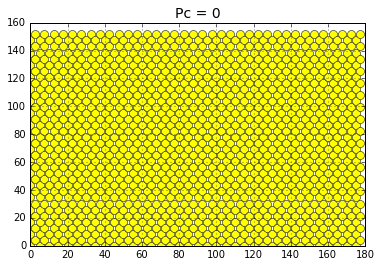

In [42]:
# Percentage 0%
# Use Nx = 3, Ny = 3
loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0
pc = 0

mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)

0.111111111111


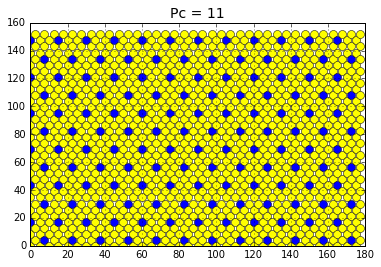

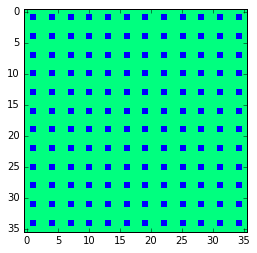

In [44]:
# Percentage 11%
# Use Nx = 3, Ny = 3

loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0
pType[1,1] = 'O' 
n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

0.222222222222


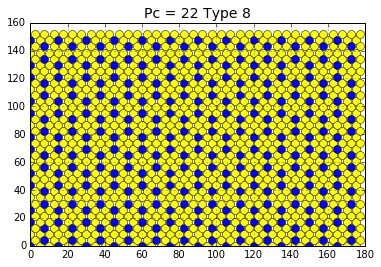

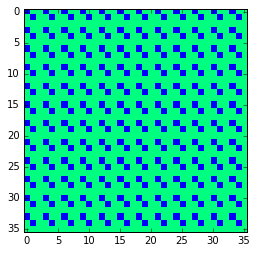

In [46]:
# Percentage 22%
# Use Nx = 3, Ny = 3

loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

# Type 0 -> Good!
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 1
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1

# Type 2
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,2] = 'O'
#n_oxys = n_oxys + 1

# Type 3 -> Good!
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,2] = 'O'
#n_oxys = n_oxys + 1

# Type 4
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1

# Type 5
#pType[0,1] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 6 -> Maybe Good??
#pType[0,2] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 7
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1

# Type 8 -> Good!
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[1,1] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = ' Type 8' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

0.333333333333


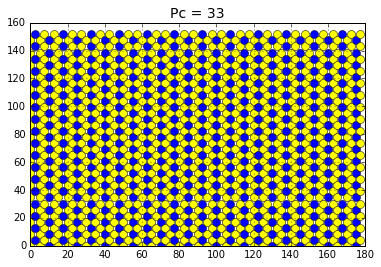

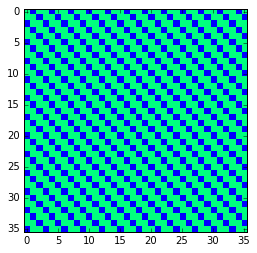

In [48]:
# Percentage 33%
# Use Nx = 3, Ny = 3

loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

# Type 0
pType[2,0] = 'O'
n_oxys = n_oxys + 1
pType[0,1] = 'O'
n_oxys = n_oxys + 1
pType[1,2] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
print pc
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

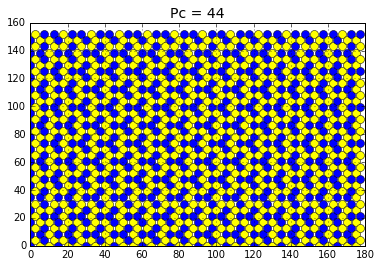

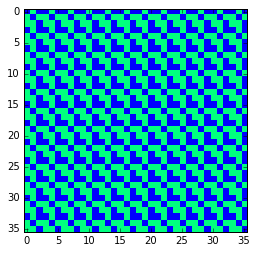

In [50]:
# Percentage 44%
# Use Nx = 3, Ny = 3

loop = '3x3' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0

"""
# Type 0 -> Good!
pType[1,0] = 'O'
n_oxys = n_oxys + 1
pType[0,1] = 'O'
n_oxys = n_oxys + 1
pType[2,1] = 'O'
n_oxys = n_oxys + 1
pType[1,2] = 'O'
n_oxys = n_oxys + 1


# Type 2
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[2,0] = 'O'
n_oxys = n_oxys + 1
pType[0,2] = 'O'
n_oxys = n_oxys + 1
pType[2,2] = 'O'
n_oxys = n_oxys + 1
"""

# Type 3 -> Very Good!
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[2,2] = 'O'
n_oxys = n_oxys + 1
pType[0,2] = 'O'
n_oxys = n_oxys + 1
pType[1,1] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
mytext = '' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)
plotheat(pType, pc, Nx*xcopies, Ny*ycopies, loop)

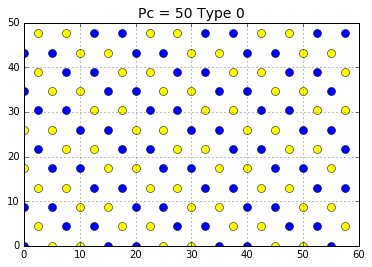

In [11]:
# Percentage 50%
# Use Nx = 4, Ny = 2


loop = '12x12' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0 

# Type 0 => Good!
pType[0,0] = 'O'
n_oxys = n_oxys + 1
pType[3,0] = 'O'
n_oxys = n_oxys + 1
pType[2,1] = 'O'
n_oxys = n_oxys + 1
pType[1,1] = 'O'
n_oxys = n_oxys + 1

# Type 1
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1
#pType[3,1] = 'O'
#n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)

mytext = ' Type 0' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)

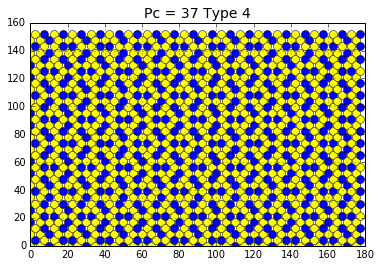

In [56]:
# Looking for Percentage 40% (if 44% shows complete wetting, we'll need a smaller pc between 33% and 44%)
# Use Nx = 4, Ny = 4
loop = '12x12' # end of file name
pType = pdb.C_restart(Nx*xcopies,Ny*ycopies)
n_oxys = 0 

# Type 0: using Nx = 4, Ny = 4 
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1
#pType[3,1] = 'O'
#n_oxys = n_oxys + 1
#pType[2,2] = 'O'
#n_oxys = n_oxys + 1
#pType[0,3] = 'O'
#n_oxys = n_oxys + 1
#pType[2,3] = 'O'
#n_oxys = n_oxys + 1

# Type 1: using Nx = 4, Ny = 4 
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1
#pType[3,1] = 'O'
#n_oxys = n_oxys + 1
#pType[2,1] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1

# Type 2: using Nx = 4, Ny = 2 
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[3,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1

# Type 3: using Nx = 4, Ny = 2 
#pType[0,0] = 'O'
#n_oxys = n_oxys + 1
#pType[2,0] = 'O'
#n_oxys = n_oxys + 1
#pType[1,1] = 'O'
#n_oxys = n_oxys + 1

# Type 4: using Nx = 4, Ny = 4 => Good (maybe could be better)
pType[2,0] = 'O'
n_oxys = n_oxys + 1
pType[0,1] = 'O'
n_oxys = n_oxys + 1
pType[3,1] = 'O'
n_oxys = n_oxys + 1
pType[1,2] = 'O'
n_oxys = n_oxys + 1
pType[0,3] = 'O'
n_oxys = n_oxys + 1
pType[2,3] = 'O'
n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)

mytext = ' Type 4' # Plot title
pType = copycell(Nx, Ny, pType, xcopies, ycopies)
plotgrid(pType, pc, Nx*xcopies, Ny*ycopies, mytext, loop)